# **SOLLDA1 MCO: IBM HR Analytics Employee Attrition & Performance**

## **I. Objective** 

This analysis aims to **understand the key factors influencing employee attrition and career growth within IBM**. By examining attributes such as job role, performance rating, years at the company, work-life balance, and employee satisfaction, the group can identify patterns that contribute to voluntary and involuntary departures. In addition, the study will help in recognizing high-potential employees suitable for promotion by leveraging data on job involvement, training opportunities, and post career progression. Through this approach, the group seeks to enhance employee retention strategies and optimize internal talent management. 

## **II. Problem Statement** 

High employee turnover and ineffective talent management at IBM lead to increased costs and lost productivity. This analysis seeks to:  
1. **Identify factors driving attrition** (e.g., job role, satisfaction, work-life balance).  
2. **Spot high-potential employees for promotion** based on performance, training, and career growth.  
3. **Improve retention strategies** to reduce turnover and enhance employee satisfaction.  

By addressing these issues, IBM can reduce costs, retain top talent, and optimize workforce performance.

## **III. Background** 

Employee attrition and talent management are critical issues in the corporate world, as high turnover rates can disrupt operations, increase recruitment costs, and reduce morale. To address these challenges, organizations like IBM can leverage data-driven insights to understand why employees leave and how to identify and retain top talent, ultimately improving workforce stability and performance. The dataset used for this analysis is the **IBM HR Analytics Employee Attrition & Performance Dataset**, available on Kaggle, which contains anonymized employee data focusing on factors related to attrition, performance, and career growth. This data was likely collected through IBM's internal HR systems, including employee surveys, performance reviews, and HR records, and it includes both quantitative metrics (e.g., age, salary, years at the company) and qualitative metrics (e.g., job satisfaction, work-life balance) to provide a comprehensive view of employee dynamics.

## **IV. Data Source**

The data provider is IBM, and it contains anonymized employee records focusing on factors related to attrition, performance, and career growth. The data was likely gathered through IBM's internal HR systems, including employee surveys, performance reviews, and HR records, and is provided in a structured tabular format (e.g., CSV or Excel). It includes both quantitative metrics (e.g., age, salary, years at the company) and qualitative metrics (e.g., job satisfaction, work-life balance), offering a comprehensive view of employee dynamics.

While the dataset does not explicitly specify the time period it covers, it appears to represent a snapshot of IBM's workforce at a specific point in time, likely spanning multiple years of employee tenure and performance data

## **V. Data Description** 

Import necessary libraries

In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

Load the dataset

In [157]:
df = pd.read_csv('IBM-HR-Employee-Attrition.csv') 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Display column names and data types

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of 35 columns that capture different aspects of employees' professional background, work conditions, and job satisfaction. Below is an explanation of each variable: 

#### **1. Employee Demographics** 
- **Age** (*int*) - The age of the employee. 

- **Gender** (*object*) - The gender of the employee (e.g., Male, Female). 

- **MaritalStatus** (*object*) - The marital status of the employee (e.g., Single, Married, Divorced). 

- **Education** (*int*) - Level of education on a scale (1 to 5) where: 
    - 1 = Below College 
    - 2 = College 
    - 3 = Bachelor 
    - 4 = Master 
    - 5 = Doctorate 
    
- **EducationField** (*object*) - The field of education (e.g., Life Sciences, Marketing, Technical Degree).

#### **2. Job and Work Details** 
- **JobRole** (*object*) - The specific job title of the employee (e.g., Sales Executive, Research Scientist). 

- **Department** (*object*) - The department in which the employee works (e.g., Sales, Research & Development, Human Resources). 

- **JobLevel** (*int*) - The hierarchichal level of the job within the organization (e.g., 1 = Entry Level, 5 = Senior Management). 

- **JobInvolvement** (*int*) - Level of employee involvement in the job.  
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **JobSatisfaction** (*int*) - Employee satisfaction with the job. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **WorkLifeBalance** (*int*) - Employee's perception of work-life balance. 
    - 1 = Bad 
    - 2 = Good 
    - 3 = Better 
    - 4 = Best

- **OverTime** (*object*) - Indicates whether the employee works overtime (Yes/No). 

- **StandardHours** (*int*) - Standard working hours for employees (appears to be a constant value). 

#### **3. Compensation and Benefits** 
- **HourlyRate** (*int*) - The hourly wage of the employee. 

- **DailyRate** (*int*) - The daily pay rate of the employee. 

- **Monthly Income** (*int*) - The total monthly earnings of the employee. 

- **StockOptionLevel** (*int*) - Stock option level granted to the employee (0 = No stock options, 3 = High stock options). 

- **PercentageSalaryHike** (*int*) - Percentage increase in salary after the last performance review. 

#### **4. Employment History and Tenure** 
- **YearsAtCompany** (*int*) - The number of years the employee has been with the company. 

- **YearsInCurrentRole** (*int*) - The number of years the employee has been in their current role. 

- **YearsSinceLastPromotion** (*int*) - The number of years since the employee's last promotion. 

- **YearsWithCurrManager** (*int*) - The number of years the employee has worked with their current manager. 

- **TotalWorkingYears** (*int*) - The total number of years the employee has worked in their career. 

- **NumCompaniesWorked** (*int*) - The number of revious companies the employee has worked for. 

#### **5. Employee Satisfaction and Performance** 
- **PerformanceRating** (*int*) - Employee's most recent performance rating. 
    - 1 = Low 
    - 2 = Good 
    - 3 = Excellent 
    - 4 = Outstanding 

- **RelationShipSatisfaction** (*int*) - Employee's satisfaction with their relationships at work. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **EnvironmentSatisfaction** (*int*) - Employee's satisfaction with the work environment (Scale: 1 = Low, 4 = High). 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **TrainingTimesLastYear** (*int*) - Number of training sessions attended by the employee in the last year.

#### **6. Attrition and Travel** 
- **Attrition** (*object*) - Indicates whether the employee has left the company (Yes/No). 

- **BusinessTravel** (*object*) - Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently, Non-Travel).

- **DistanceFromHome** (*int*) - The distance between the employee's home and workplace. 

#### **7. Miscellaneous** 
- **EmployeeNumber** (*int*) - Unique ID assigned to each employee. 

- **EmployeeCount** (*int*) - Seems to be a constant column (always 1). 

- **Over18** (*object*) - Indicates if the employee is over 18 (constant "Y" for all). 

 Dropping columns due to redundancy or minimal impact

- **EmployeeNumber** - just an ID, not useful for the analysis.
- **HourlyRate, DailyRate** -  These are compensation-related columns. While compensation can influence attrition, Monthly Income is sufficient to capture this information. Drop HourlyRate and DailyRate to avoid redundancy.
- **EmployeeCount** - Constant value (always 1).
- **Over18** - Constant value (always "Y").
- **StandardHours** - Constant value (likely the same for all employees).



In [159]:
df.drop(columns=['EmployeeNumber', 'HourlyRate', 'DailyRate', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

Check for duplicates (if any)

In [160]:
df.duplicated().sum()

np.int64(0)

Detect any outliers in the data

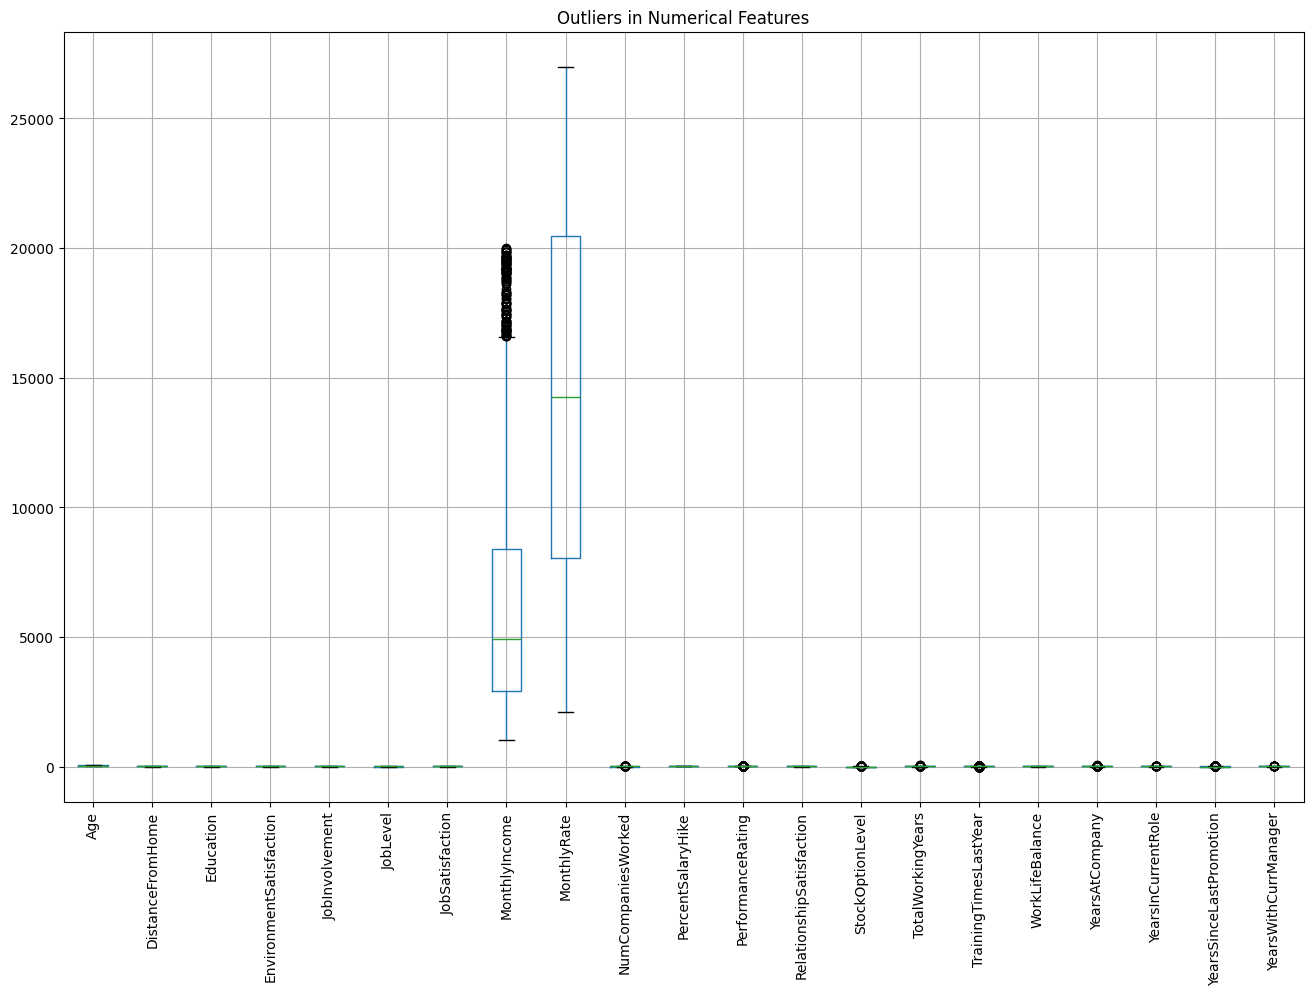

In [161]:
plt.figure(figsize=(16, 10)) 
df.select_dtypes(include=['int64', 'float64']).boxplot(rot=90) 
plt.title("Outliers in Numerical Features")
plt.show()

Categorical features need to be converted into numerical values using label encoding, one-hot encoding, or ordinal encoding.

Label Encoding for Binary Categorical Columns

In [162]:
from sklearn.preprocessing import LabelEncoder

binary_categorical_columns = ['Gender', 'OverTime', 'Attrition']

label_encoder = LabelEncoder()

for col in binary_categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

Ordinal Encoding for BusinessTravel

In [163]:
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

Numerical columns need scaling to ensure they are on a similar scale for modeling.

Columns to transform:
- **Age (int)**
- **DistanceFromHome (int)**:
- **Monthly Income (int)**:
- **PercentageSalaryHike (int)**:
- **YearsAtCompany (int)**:
- **YearsInCurrentRole (int)**:
- **YearsSinceLastPromotion (int)**:
- **YearsWithCurrManager (int)**:
- **TotalWorkingYears (int)**:
- **NumCompaniesWorked (int)**:
- **TrainingTimesLastYear (int)**:


In [164]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked', 
    'TrainingTimesLastYear'
]

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#### **Feature Engineering**

We can create new features to capture additional insights: 

- **PromotionStagnation** : Ratio of YearsSinceLastPromotion to YearsAtCompany.
- **RoleStagnation** : Ratio of YearsInCurrentRole to YearsAtCompany.
- **ManagerTenureImpact** : Ratio of YearsWithCurrManager to YearsAtCompany.
- **IncomeToHikeRatio** : Ratio of Monthly Income to PercentageSalaryHike.

Creating new features like PromotionStagnation, RoleStagnation, ManagerTenureImpact, and IncomeToHikeRatio can provide deeper insights into employee behavior, satisfaction, and career progression. These engineered features capture relationships between existing variables that might not be immediately apparent, helping us better understand the factors influencing employee attrition and career growth. 

In [165]:
df['PromotionStagnation'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany']
df['RoleStagnation'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['ManagerTenureImpact'] = df['YearsWithCurrManager'] / df['YearsAtCompany']
df['IncomeToHikeRatio'] = df['MonthlyIncome'] / df['PercentSalaryHike']

df.fillna(0, inplace=True) 

Here is the new and transformed dataset

In [166]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
0,0.446350,1,1,Sales,-1.010909,2,Life Sciences,2,0,3,...,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834,4.125708,0.384513,-1.493405,0.094172
1,1.322365,0,2,Research & Development,-0.147150,1,Life Sciences,3,1,2,...,0.155707,3,0.488508,0.764998,-0.368715,0.806541,-0.754779,1.565989,1.651031,-0.137002
2,0.008343,1,1,Research & Development,-0.887515,2,Other,4,1,2,...,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935,0.593506,1.020443,1.010173,16.373254
3,-0.429664,0,2,Research & Development,-0.764121,4,Life Sciences,4,0,3,...,0.155707,3,0.161947,0.764998,0.252146,-1.155935,1.556960,4.723744,-7.137721,0.663709
4,-1.086676,0,1,Research & Development,-0.887515,1,Medical,1,1,3,...,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227,0.071276,0.752680,0.727898,0.735105


## **VI. Exploratory Data Analysis** 

#### 1. Data Overview  

 Summary statistics (mean, median, standard deviation, etc.).

In [167]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
count,1.470000e+03,1470.000000,1470.000000,1470,1.470000e+03,1470.000000,1470,1470.000000,1470.000000,1470.000000,...,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,NaN,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,961,NaN,NaN,606,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-3.504377e-17,0.161224,1.086395,NaN,4.350262e-17,2.912925,NaN,2.721769,0.600000,2.729932,...,8.700523e-17,2.761224,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17,-7.053776,-21.019815,-22.705011,-0.097954
std,1.000340e+00,0.367863,0.532170,NaN,1.000340e+00,1.024165,NaN,1.093082,0.490065,0.711561,...,1.000340e+00,0.706476,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,167.934519,135.661284,142.102957,4.859645
min,-2.072192e+00,0.000000,0.000000,NaN,-1.010909e+00,1.000000,NaN,1.000000,0.000000,1.000000,...,-2.171982e+00,1.000000,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00,-1120.764847,-573.934887,-605.102916,-49.803476
25%,-7.581700e-01,0.000000,1.000000,NaN,-8.875151e-01,2.000000,NaN,2.000000,0.000000,2.000000,...,-6.201892e-01,2.000000,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01,0.071276,0.690985,0.667924,-0.708562
50%,-1.011589e-01,0.000000,1.000000,NaN,-2.705440e-01,3.000000,NaN,3.000000,1.000000,3.000000,...,1.557071e-01,3.000000,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01,0.692289,1.035074,1.010173,0.114779
75%,6.653541e-01,0.000000,1.000000,NaN,5.932157e-01,4.000000,NaN,4.000000,1.000000,3.000000,...,1.557071e-01,3.000000,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01,1.556960,1.616053,1.688777,0.924939


Data dimensions (number of rows and columns). 

In [168]:
df.shape

(1470, 33)

Data types and data distribution (categorical, numerical, etc.)

In [169]:
df.dtypes

Age                         float64
Attrition                     int64
BusinessTravel                int64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                        int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

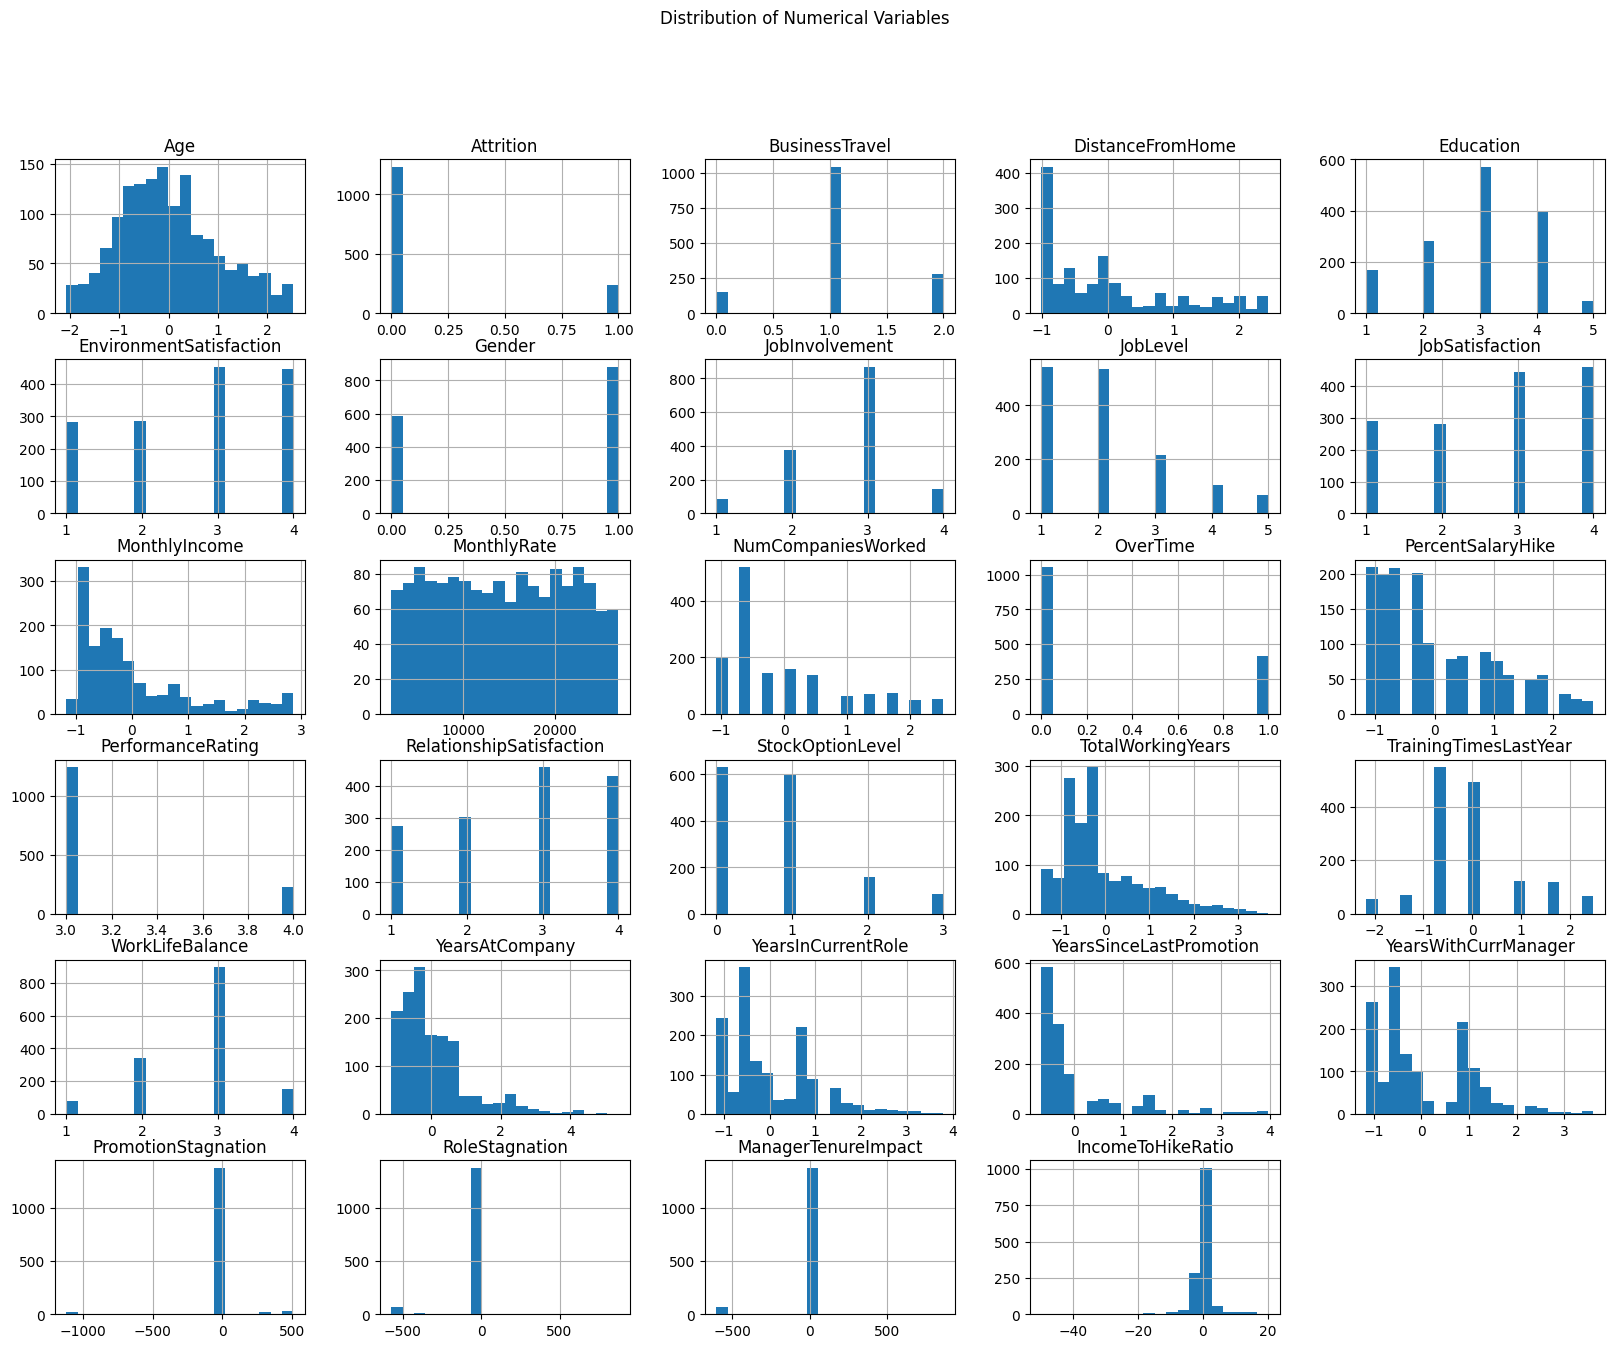

In [170]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

Missing data and handling strategies. 


In [171]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PromotionStagnation         0
RoleStagnation              0
ManagerTenureImpact         0
IncomeToHikeRatio           0
dtype: int

Since there are no missing data, no data handling is necessary.

#### 2. Univariate Analysis

Visualizations and summary statistics for individual variables.

In [172]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].describe()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
count,1.470000e+03,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000
mean,-3.504377e-17,0.161224,1.086395,4.350262e-17,2.912925,2.721769,0.600000,2.729932,2.063946,2.728571,...,8.700523e-17,2.761224,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17,-7.053776,-21.019815,-22.705011,-0.097954
std,1.000340e+00,0.367863,0.532170,1.000340e+00,1.024165,1.093082,0.490065,0.711561,1.106940,1.102846,...,1.000340e+00,0.706476,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,167.934519,135.661284,142.102957,4.859645
min,-2.072192e+00,0.000000,0.000000,-1.010909e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,-2.171982e+00,1.000000,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00,-1120.764847,-573.934887,-605.102916,-49.803476
25%,-7.581700e-01,0.000000,1.000000,-8.875151e-01,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,...,-6.201892e-01,2.000000,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01,0.071276,0.690985,0.667924,-0.708562
50%,-1.011589e-01,0.000000,1.000000,-2.705440e-01,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,...,1.557071e-01,3.000000,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01,0.692289,1.035074,1.010173,0.114779
75%,6.653541e-01,0.000000,1.000000,5.932157e-01,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,...,1.557071e-01,3.000000,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01,1.556960,1.616053,1.688777,0.924939
max,2.526886e+00,1.000000,2.000000,2.444129e+00,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,...,2.483396e+00,4.000000,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00,509.524985,876.050379,867.233099,20.228246


Box plots show the distribution of numerical variables and identify outliers.

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


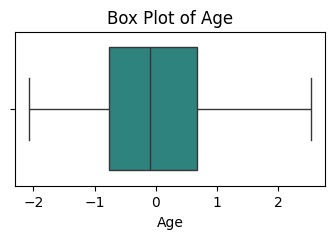

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


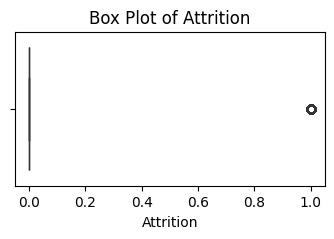

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


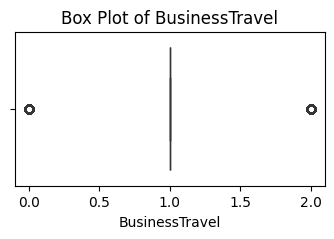

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


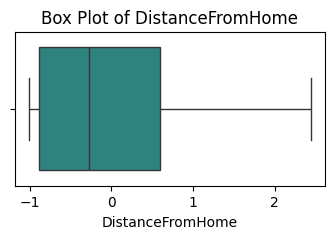

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


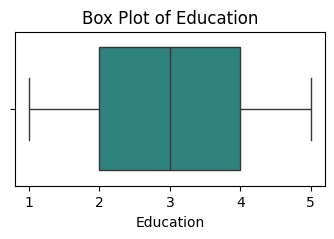

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


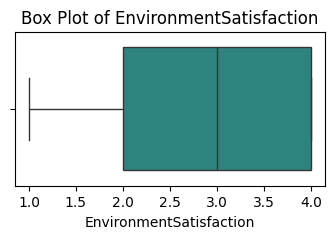

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


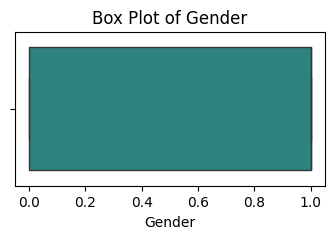

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


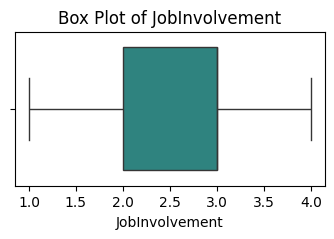

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


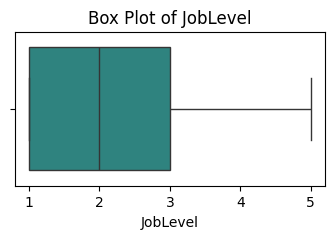

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


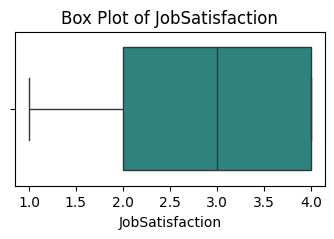

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


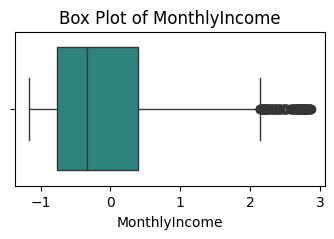

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


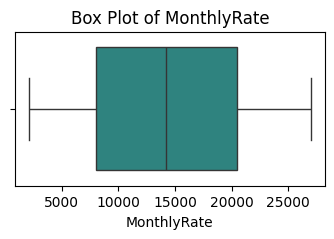

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


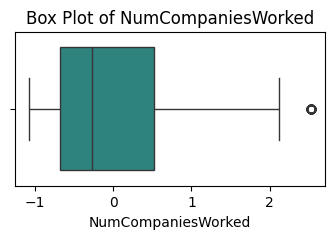

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


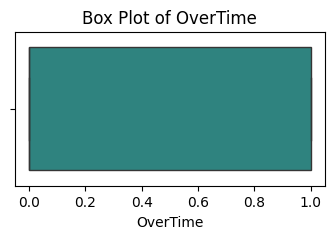

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


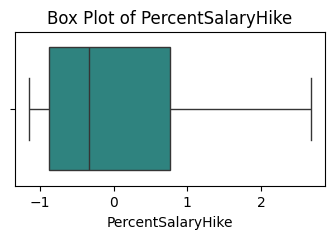

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


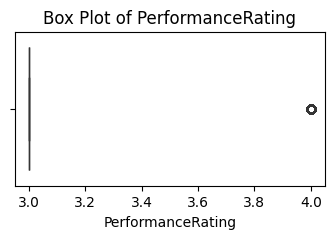

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


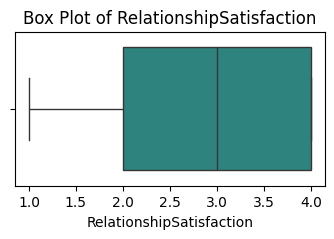

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


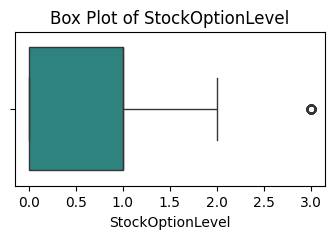

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


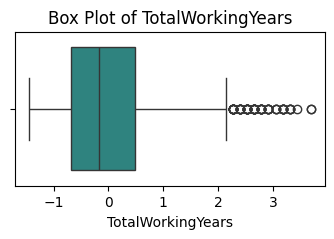

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


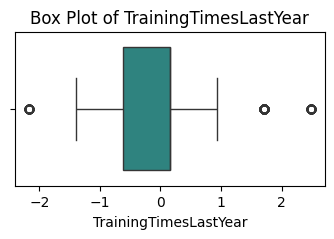

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


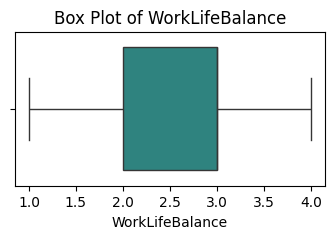

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


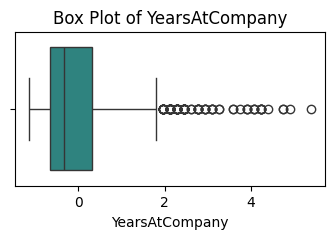

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


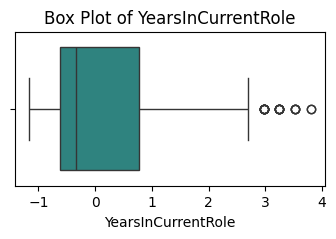

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


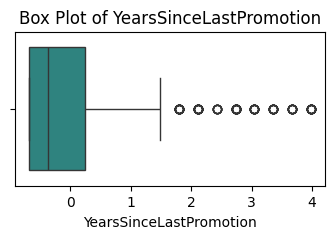

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


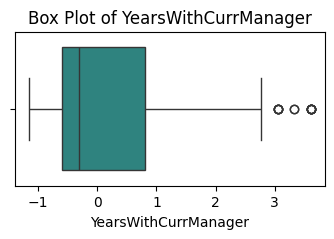

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


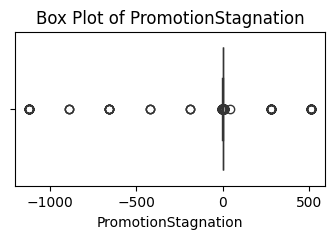

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


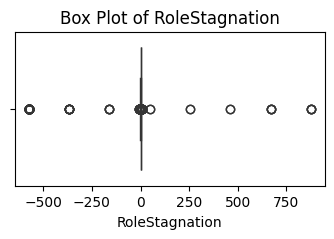

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


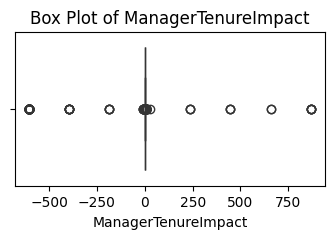

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1930105220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


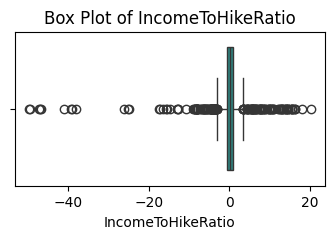

In [173]:
for col in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f"Box Plot of {col}")
    plt.show()

Below, we created a function to detect outliers. Outliers can be identified using box plots or statistical methods like the Interquartile Range (IQR).

The IQR method identifies outliers as values below Q1 - 1.5 X IQR or abvoe Q3 + 1.5 X IQR.

In [174]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")
    print("-" * 50)

Number of outliers in Age: 0
--------------------------------------------------
Number of outliers in Attrition: 237
--------------------------------------------------
Number of outliers in BusinessTravel: 427
--------------------------------------------------
Number of outliers in DistanceFromHome: 0
--------------------------------------------------
Number of outliers in Education: 0
--------------------------------------------------
Number of outliers in EnvironmentSatisfaction: 0
--------------------------------------------------
Number of outliers in Gender: 0
--------------------------------------------------
Number of outliers in JobInvolvement: 0
--------------------------------------------------
Number of outliers in JobLevel: 0
--------------------------------------------------
Number of outliers in JobSatisfaction: 0
--------------------------------------------------
Number of outliers in MonthlyIncome: 114
--------------------------------------------------
Number of outlier

#### 3. Bivariate Analysis

This analysis explores the relationship between attrition and key workplace factors to identify patterns, associations, or potential causal links. Specifically, we examine how attrition correlates with:

- Job Role
- Overtime
- Work-Life Balance
- Years Since Last Promotion 

##### **Job Role vs Attrition**


/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1844478879.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobrole_attrition = _sub_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100


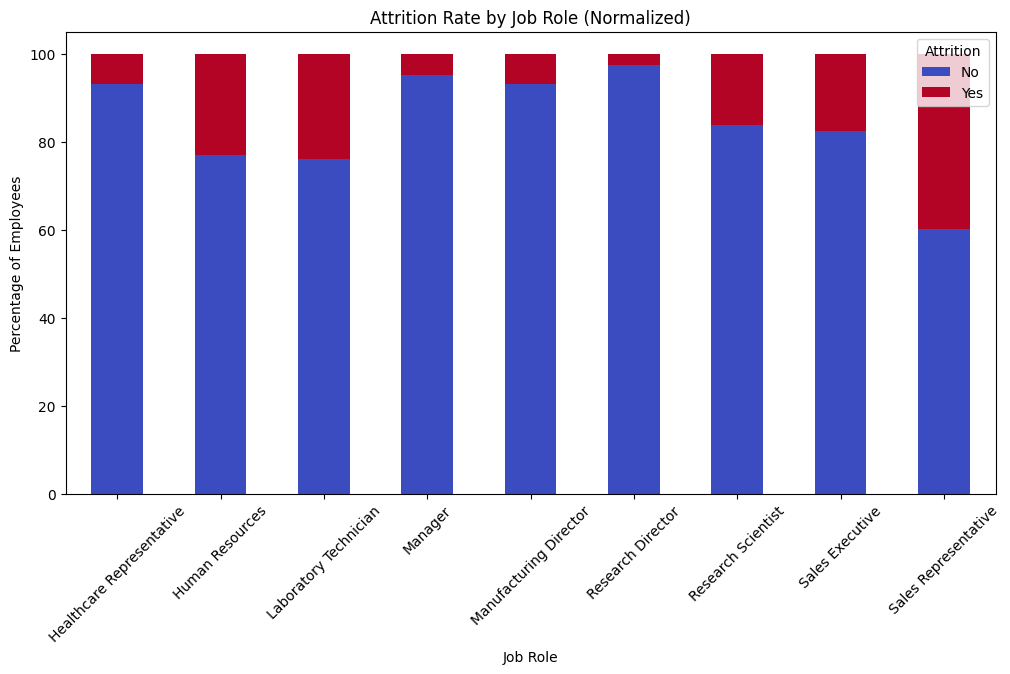

In [ ]:
_sub_df = df[['JobRole', 'Attrition']].copy()
_sub_df['Attrition'] = _sub_df['Attrition'].replace({1: 'Yes', 0: 'No'}).astype('category')
_sub_df['JobRole'] = _sub_df['JobRole'].astype('category')

jobrole_attrition = _sub_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
jobrole_attrition.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Job Role")
plt.ylabel("Percentage of Employees")
plt.title("Attrition Rate by Job Role (Normalized)")
plt.legend(title="Attrition", labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

We are going to use exploratory statistical test to validate initial findings.

Hypothesis for Chi-Square test: 
- H<sub>0</sub>: There is no significant relationship between an employee's job role and attrition.
- H<sub>1</sub>: Job role significantly affects attrition.

Assumption:

- Observations are independent.
- The expected frequency in each cell of contingeny table should be at least 5.

For the Chi-Square test to be valid, all assumptions must be satisfied.

**Assumption test**

In [ ]:

contingency_table = pd.crosstab(_sub_df['JobRole'], _sub_df['Attrition'])
print("Contingency Table:\n", contingency_table)

duplicates = _sub_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\nExpected Frequencies Table:\n", expected_df)

# Check assumption of expected frequencies ≥ 5
if (expected < 5).sum() > 0:
    print("Warning: Some expected frequencies are less than 5, which may affect the validity of the Chi-Square test.")
else:
    print("All expected frequencies are ≥ 5. Assumption met.")

Contingency Table:
 Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
Number of duplicate rows: 1452

Expected Frequencies Table:
 Attrition                          No        Yes
JobRole                                         
Healthcare Representative  109.879592  21.120408
Human Resources             43.616327   8.383673
Laboratory Technician      217.242857  41.757143
Manager                     85.555102  16.444898
Manufacturing Director     121.622449  23.377551
Research Director           67.102041  12.897959
Research Scientist         244.922449  47.077551
Sales Executive            273.440816  52.559184
Sales Representative        69.61

**Chi-Square Test**

In [ ]:
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
if p < 0.05:
    print("Reject H₀: Job role has a significant relationship with attrition.")
else:
    print("Fail to reject H₀: No significant relationship between job role and attrition.")


Chi-Square Statistic: 86.19025367670434
P-Value: 2.7524816380506575e-15
Degrees of Freedom: 8
Reject H₀: Job role has a significant relationship with attrition.


**Findings**
The p-value obtained is significantly below 0.05, indicating a strong relationship between Job Role and Attrition. Moreover, the data reveals that Laboratory Technicians and Sales Representatives experience higher-than-expected attrition in visualization and statistical test, while Managers and Research Directors have lower-than-expected attrition rates. Visuals may suggest that there is stability in higher position roles and those with high attrition roles are the experiencing other factors that contribute in those roles. Further test may be conducted to have deeper insights.

##### **Overtime vs Attrition**

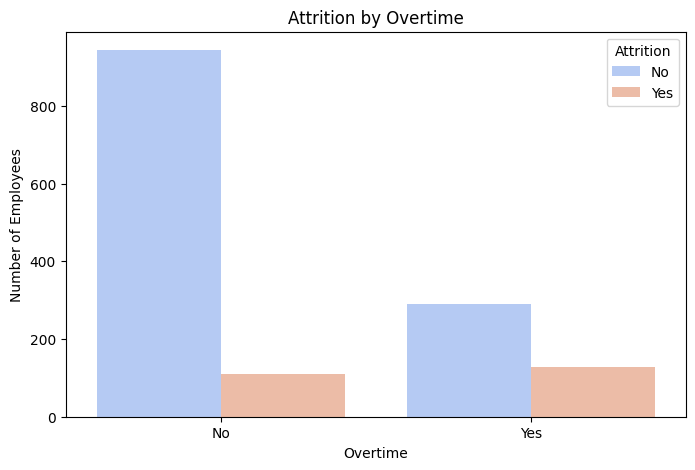

In [187]:
_sub_df = df[['OverTime', 'Attrition']].copy()
_sub_df['Attrition'] = _sub_df['Attrition'].replace({1: 'Yes', 0: 'No'}).astype('category')
_sub_df['OverTime'] = _sub_df['OverTime'].replace({1: 'Yes', 0: 'No'}).astype('category')

plt.figure(figsize=(8, 5))
sns.countplot(x=_sub_df['OverTime'], hue=_sub_df['Attrition'], palette='coolwarm')
plt.xlabel("Overtime")
plt.ylabel("Number of Employees")
plt.title("Attrition by Overtime")
plt.legend(title="Attrition", labels=['No', 'Yes'])

plt.show()

We are going to use exploratory statistical test to validate initial findings.

Hypothesis for Chi-Square test:
- H<sub>0</sub>: Overtime does not significantly impact employee attrition.
- H<sub>1</sub>: Employees who work overtime are more likely to leave the company.

Assumptions:
- Observations are independent.
- Sufficient sample size for Chi-Square test.

For the Chi-Square test to be valid, all assumptions must be satisfied.

**Assumption Test**

In [188]:
contingency_table = pd.crosstab(_sub_df['OverTime'], _sub_df['Attrition'])
print("Contingency Table:\n", contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Convert expected frequencies to DataFrame
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\nExpected Frequencies Table:\n", expected_df)

# Check assumption of expected frequencies ≥ 5
if (expected < 5).sum() > 0:
    print("Warning: Some expected frequencies are less than 5, which may affect the validity of the Chi-Square test.")
else:
    print("All expected frequencies are ≥ 5. Assumption met.")

Contingency Table:
 Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

Expected Frequencies Table:
 Attrition          No         Yes
OverTime                         
No         884.069388  169.930612
Yes        348.930612   67.069388
All expected frequencies are ≥ 5. Assumption met.


**Chi-Square Test**

In [178]:
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
if p < 0.05:
    print("Reject H₀: Overtime has a significant relationship with attrition.")
else:
    print("Fail to reject H₀: No significant relationship between employee overtime and attrition.")


Chi-Square Statistic: 87.5643
P-Value: 0.0000
Degrees of Freedom: 1
Reject H₀: Overtime has a significant relationship with attrition.


**Findings:** The p-value obtained is significantly below 0.05, indicating a strong relationship between Overtime and Attrition. The attrition rate obeserved was ~189.4% higher than the expexted value. The proportion of employees leaving is higher among those who work overtime compared to those who don’t. Even though fewer employees work overtime, a larger portion of them quit.

##### **Work-life Balance vs Attrition**

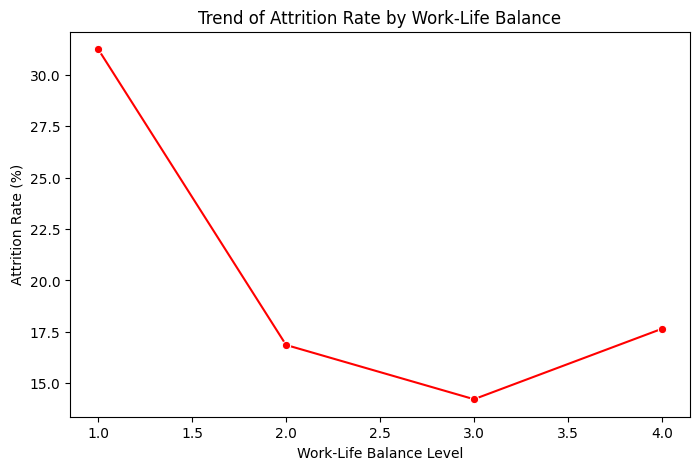

In [194]:
_sub_df = df[['WorkLifeBalance', 'Attrition']].copy()
attrition_rates = df.groupby('WorkLifeBalance')['Attrition'].mean() * 100
plt.figure(figsize=(8,5))
sns.lineplot(x=attrition_rates.index, y=attrition_rates.values, marker="o", color="red")
plt.xlabel("Work-Life Balance Level")
plt.ylabel("Attrition Rate (%)")
plt.title("Trend of Attrition Rate by Work-Life Balance")
plt.show()


**Findings:** General trend shows that poor work life balance has the highest attrition and as work life balance to 2.0 it dropped significantly around 17%, then declined more to it's lowest point in 3.0, however shortly after the 15% decline it rose to 17% again, while we dont have certail idea about the reason of this rise, it may suggest dissatisfaction on job or ack of challenges, disengagement, or complacency leading to seeking new opportunities.



##### **Years Since Last Promotion vs Attrition**

/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/952079072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Attrition'], y=df['YearsSinceLastPromotion'], inner=None, palette="coolwarm", alpha=0.7)


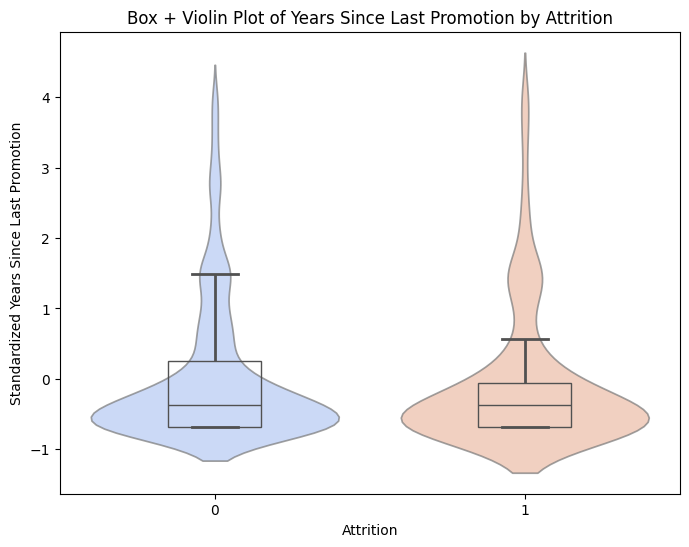

In [197]:
plt.figure(figsize=(8, 6))

sns.violinplot(x=df['Attrition'], y=df['YearsSinceLastPromotion'], inner=None, palette="coolwarm", alpha=0.7)

sns.boxplot(x=df['Attrition'], y=df['YearsSinceLastPromotion'], width=0.3, showcaps=True, boxprops={'facecolor':'None'}, 
            showfliers=False, whiskerprops={'linewidth':2}, capprops={'linewidth':2})

plt.xlabel("Attrition")
plt.ylabel("Standardized Years Since Last Promotion")
plt.title("Box + Violin Plot of Years Since Last Promotion by Attrition")

plt.show()

**Findings:** Both employees who left and stayed that was frequently promoted have same distribution. While that's the case, there are still presence of those who stayed longer even without promotion. Due to this, it is hard to determine relationship of the two variables.

#### 4. Multivariate Analysis

Due to the abundance of outliers found in the features we will be working on for our multivariate analysis, we will utilize PERMANOVA testing as opposed to MANOVA. The frequent outliers, particularly for YearsAtCompany (104) and PerformanceRating (226), caused skewedness which vioates the assumption of normal distribution of the dependent variables.

Assumptions for PERMANOVA Testing:

1. Observations are randomly and independently sampled from the population
2. Homogeneity of Multivariate Dispersion 

**1. Observations are randomly and independently sampled from the population**

As mentioned in section **IV. Data Source**, the data is from anonymized employee records which should not contian duplicates by traditional standards.

**2. Homogeneity of Multivariate Dispersion**

In [ ]:
from scipy.spatial.distance import cdist
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

subset_df = df[['MaritalStatus', 'YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']]

# Encode 'MaritalStatus' for testing
label_encoder = LabelEncoder()
subset_df['MaritalStatus_encoded'] = label_encoder.fit_transform(subset_df['MaritalStatus'])

# Check Homogeneity of Multivariate Dispersion (PERMDISP)
# Calculate group centroids
centroids = subset_df.groupby('MaritalStatus')[['YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']].mean()

# Compute distances to centroids
distances = []
for group in subset_df['MaritalStatus'].unique():
    group_data = subset_df[subset_df['MaritalStatus'] == group][['YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']]
    centroid = centroids.loc[group].values
    dists = cdist(group_data, [centroid])
    distances.extend(dists.flatten())

subset_df['DistanceToCentroid'] = distances

# Perform ANOVA on the distances
groups = [subset_df.loc[subset_df['MaritalStatus'] == group, 'DistanceToCentroid'].values for group in subset_df['MaritalStatus'].unique()]
permdisp = f_oneway(*groups)
print("PERMDISP Test (Homogeneity of Multivariate Dispersion):")
print(permdisp)

PERMDISP Test (Homogeneity of Multivariate Dispersion):
F_onewayResult(statistic=np.float64(0.6223717683688145), pvalue=np.float64(0.53681171076905))


/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1936226859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['MaritalStatus_encoded'] = label_encoder.fit_transform(subset_df['MaritalStatus'])
/var/folders/v4/bt2lngkd2wl5gfnc78z244xr0000gn/T/ipykernel_77205/1936226859.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['DistanceToCentroid'] = distances


We used PERMDISP Testing to check if the variance of the data points around the centroids is similar to the groups under MaritalStatus (Single, Married, or Divorced)

For each marital status group, we calculated the centroid, which is the mean position of the data points. Then for each point in a group, we computed the Euclidean distance (since the dependent variables are continuous) to its group's centroid using cdist(). And lastly we grouped these distances by MaritalStatus and performed a one-way ANOVA using f_oneway() to compare whether the average dispersion significantly differs across groups.

The p-value 0.5367 rejects the null hypothesis of equal dispersion across the marital status groups which satisfies the assumption of homogeneity of multivariate dispersion.

**One-Way PERMANOVA Testing For Identifying Factors Driving Attrition**

In [ ]:
from skbio.stats.distance import permanova, DistanceMatrix

dist_matrix = cdist(subset_df[['YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']], subset_df[['YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']])
dm = DistanceMatrix(dist_matrix)
labels = subset_df['MaritalStatus'].values
permanova_result = permanova(dm, labels, permutations=999)

print("\nPERMANOVA Test:")
print(permanova_result)

ModuleNotFoundError: No module named 'skbio'

The results in this PERMANOVA shows that the p-value of 0.131 > 0.05 which fails to reject the null hypothesis that **there were no significant differences between the groups of marital status**.

This means the marital status of an IBM employee does not affect aspects of longetivity of the employee, particularly the years they have spent in the company, their personal satisfaction with their job and their performance ratings respectively.

This insight suggests that marital status alone is not a key driver of employee attrition at IBM. It indicates that other factors—such as job role, work-life balance, or compensation—may play a more significant role in understanding why employees stay or leave.

**One-Way PERMANOVA Testing For Spotting High-Potential Employees For Promotion**

Again we first verify the assumptions, we already know that the observations are randomly and independently sampled.

In [ ]:
# Create subset with the desired variables
subset_df = df[['OverTime', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement']]

# Encode 'OverTime' for testing
label_encoder = LabelEncoder()
subset_df['OverTime_encoded'] = label_encoder.fit_transform(subset_df['OverTime'])

# Check Homogeneity of Multivariate Dispersion (PERMDISP)
# Calculate group centroids
centroids = subset_df.groupby('OverTime')[['YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement']].mean()

# Compute distances to centroids
distances = []
for group in subset_df['OverTime'].unique():
    group_data = subset_df[subset_df['OverTime'] == group][['YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement']]
    centroid = centroids.loc[group].values
    dists = cdist(group_data, [centroid])
    distances.extend(dists.flatten())

subset_df['DistanceToCentroid'] = distances

# Perform ANOVA on the distances
groups = [subset_df.loc[subset_df['OverTime'] == group, 'DistanceToCentroid'].values for group in subset_df['OverTime'].unique()]
permdisp = f_oneway(*groups)
print("PERMDISP Test (Homogeneity of Multivariate Dispersion):")
print(permdisp)

PERMDISP Test (Homogeneity of Multivariate Dispersion):
F_onewayResult(statistic=np.float64(0.00989479718851016), pvalue=np.float64(0.9207766273539988))


C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_12616\3152369794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['OverTime_encoded'] = label_encoder.fit_transform(subset_df['OverTime'])
C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_12616\3152369794.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['DistanceToCentroid'] = distances


We once again used PERMDISP Testing to evaluate the null hypothesis that **there are no significant differences in the dispersion between the groups of OverTime (Yes/No)**.

The resulting p-value of 0.9208 > 0.05, meaning we fail to reject the null hypothesis. This indicates that the dispersion of YearsAtCompany, YearsSinceLastPromotion, and JobInvolvement is consistent across the OverTime groups, thereby satisfying the assumption of homogeneity required for PERMANOVA.

In [ ]:
dist_matrix = cdist(subset_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement']], subset_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'JobInvolvement']])
dm = DistanceMatrix(dist_matrix)
labels = subset_df['OverTime'].values
permanova_result = permanova(dm, labels, permutations=999)

print("\nPERMANOVA Test:")
print(permanova_result)


PERMANOVA Test:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                    1470
number of groups                  2
test statistic             0.171425
p-value                       0.882
number of permutations          999
Name: PERMANOVA results, dtype: object


The results in this PERMANOVA show that the p-value of 0.901 > 0.05, which fails to reject the null hypothesis that **there were no significant differences between the groups of OverTime**.

This means the OverTime status of an IBM employee does not affect aspects of their career progression, particularly the years they have spent in the company, the years since their last promotion, and their job involvement respectively.

This insight suggests that overtime work alone is not a reliable indicator of high-potential employees for promotion. Instead, performance, training, and career growth metrics may provide a more accurate basis for identifying employees suitable for advancement at IBM.

**One-Way PERMANOVA Testing For Improving Retention Strategies**

Again we first verify the assumptions, we already know that the observations are randomly and independently sampled.

In [ ]:
subset_df = df[['JobRole', 'WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike']]

# Encode 'JobRole' for testing
label_encoder = LabelEncoder()
subset_df['JobRole_encoded'] = label_encoder.fit_transform(subset_df['JobRole'])

# Check Homogeneity of Multivariate Dispersion (PERMDISP)
# Calculate group centroids
centroids = subset_df.groupby('JobRole')[['WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike']].mean()

# Compute distances to centroids
distances = []
for group in subset_df['JobRole'].unique():
    group_data = subset_df[subset_df['JobRole'] == group][['WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike']]
    centroid = centroids.loc[group].values
    dists = cdist(group_data, [centroid])
    distances.extend(dists.flatten())

subset_df['DistanceToCentroid'] = distances

# Perform ANOVA on the distances
groups = [subset_df.loc[subset_df['JobRole'] == group, 'DistanceToCentroid'].values for group in subset_df['JobRole'].unique()]
permdisp = f_oneway(*groups)

print("PERMDISP Test (Homogeneity of Multivariate Dispersion):")
print(permdisp)

PERMDISP Test (Homogeneity of Multivariate Dispersion):
F_onewayResult(statistic=np.float64(1.523060164718683), pvalue=np.float64(0.14425638076717193))


C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_12616\1416216558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['JobRole_encoded'] = label_encoder.fit_transform(subset_df['JobRole'])
C:\Users\Matthew Sanchez\AppData\Local\Temp\ipykernel_12616\1416216558.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['DistanceToCentroid'] = distances


We once again used PERMDISP Testing to evaluate the null hypothesis that there are no significant differences in the dispersion between the groups of JobRole.

The resulting p-value of 0.1443 > 0.05, meaning we fail to reject the null hypothesis. This indicates that the dispersion of WorkLifeBalance, MonthlyIncome, and PercentSalaryHike is consistent across the JobRole groups, thereby satisfying the assumption of homogeneity required for PERMANOVA.

In [ ]:
dist_matrix = cdist(subset_df[['WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike']], subset_df[['WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike']])
dm = DistanceMatrix(dist_matrix)
labels = subset_df['JobRole'].values
permanova_result = permanova(dm, labels, permutations=999)

print("\nPERMANOVA Test:")
print(permanova_result)


PERMANOVA Test:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                    1470
number of groups                  9
test statistic            90.330703
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


The results in this PERMANOVA show that the p-value of 0.001 < 0.05, which rejects the null hypothesis that there were no significant differences between the groups of JobRole.

This means the JobRole of an IBM employee does affect aspects related to employee retention, particularly their WorkLifeBalance, MonthlyIncome, and PercentSalaryHike, respectively.

This insight suggests that tailoring retention strategies to specific job roles—by addressing disparities in compensation, work-life balance, and salary growth—could improve employee satisfaction and reduce turnover across different roles at IBM.

## **Reference/s** 
-   IBM HR Analytics Employee Attrition & Performance. (2017, March 31). https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## **By Data Alchemists** 
- Bon, Jan Louise B. 
- Brodett, Ram David M.
- Lopez, Ghee Kaye S. 
- Paguiligan, James Archer B. 
- Sanchez, Matthew Heinz O. 